In [1]:
import tensorflow as tf 

# Loading - MNIST Data Set 
## Containing Training Samples - 60,000  , Testing Samples - 10,000
### Tensorflow already contain MNIST data set which can be loaded using keras

In [2]:
mnist = tf.keras.datasets.mnist 

#  After loading MNIST dataset dividing it into train set and test set

In [3]:
## unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

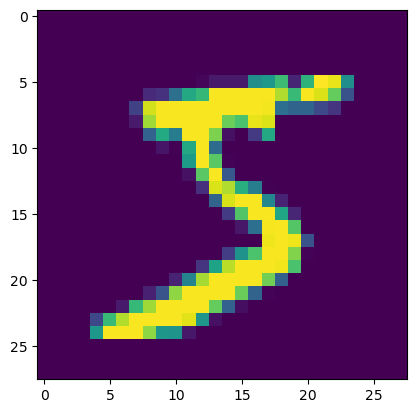

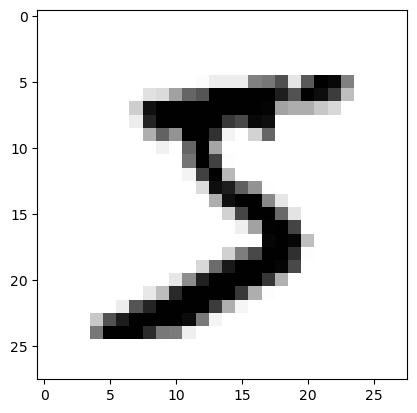

In [5]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()  ##to execute the graph

plt.imshow(x_train[0], cmap = plt.cm.binary)

## Before checking the values of each pixel
## Before Normalization

In [6]:
print (x_train[0])  ### before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As image are in Gray level (1 channel ==> 0 to 255), not Coloured (RGB)

# Normalizing the data | Pre-Processing Step

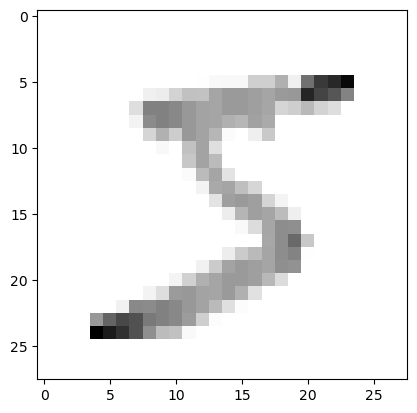

In [7]:
# normalizing 
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

#      AFTER NORMALIZING 

In [8]:

##to check normalized values
print(x_train[0]) 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
#to check wheather we have labels inside our code or not
print (y_train[0])

5


## Resizing image to make it suitable for applying Convolution operation 


In [10]:
import numpy as np
IMG_SIZE = 28
## increasing one dimension for kernal operation 
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
model = Sequential()

###### FIRST CONVOLUTION LAYER 
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

###### SECOND CONVOLUTION LAYER
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

###### THIRD CONVOLUTION LAYER
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

###### FULLY CONNECTED LAYER #1
model.add (Flatten())
model.add (Dense(64))
model.add(Activation("relu"))

###### FULLY CONNECTED LAYER #2
model.add (Dense(32))
model.add(Activation("relu"))

## last dense layer should be 10(i.e. 0-9)
model.add (Dense(10))
model.add(Activation('softmax'))


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print ("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [17]:
## Training Model
model.fit (x_trainr, y_train, epochs=5 , validation_split = 0.3, batch_size = 1)


Epoch 1/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 223s 5ms/step - accuracy: 0.8664 - loss: 0.4185 - val_accuracy: 0.9641 - val_loss: 0.1244
Epoch 2/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 319s 7ms/step - accuracy: 0.9663 - loss: 0.1161 - val_accuracy: 0.9557 - val_loss: 0.1748
Epoch 3/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 289s 7ms/step - accuracy: 0.9755 - loss: 0.0971 - val_accuracy: 0.9574 - val_loss: 0.1633
Epoch 4/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 269s 6ms/step - accuracy: 0.9799 - loss: 0.0813 - val_accuracy: 0.9764 - val_loss: 0.0981
Epoch 5/5
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 260s 6ms/step - accuracy: 0.9772 - loss: 0.0889 - val_accuracy: 0.9718 - val_loss: 0.1282


In [18]:
## Evaluating on testing data set 
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test Loss on 10,000 test samples", test_loss )
print ("Validation Accuracy on 10,000 test samples", test_acc )

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9696 - loss: 0.1638
Test Loss on 10,000 test samples 0.12137868255376816
Validation Accuracy on 10,000 test samples 0.9757000207901001


In [19]:
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [20]:
print(predictions)

[[1.6663893e-21 4.8932115e-15 8.1876970e-11 ... 1.0000000e+00
  7.3553249e-26 4.9443349e-10]
 [1.4995489e-08 3.9995324e-10 9.9976903e-01 ... 2.2495874e-04
  1.6800549e-09 8.9274124e-08]
 [7.0139882e-23 1.0000000e+00 4.3463860e-16 ... 2.8933774e-21
  1.0089977e-14 1.3868452e-20]
 ...
 [6.0747285e-32 3.9691615e-16 1.2599217e-21 ... 3.6577115e-21
  5.5084017e-18 5.6469607e-11]
 [6.4286959e-21 3.2112112e-16 2.7642755e-19 ... 9.4563772e-21
  1.3875198e-12 3.9751859e-07]
 [9.0196990e-35 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.1979648e-34 0.0000000e+00]]


In [21]:
print(np.argmax(predictions[0]))

7


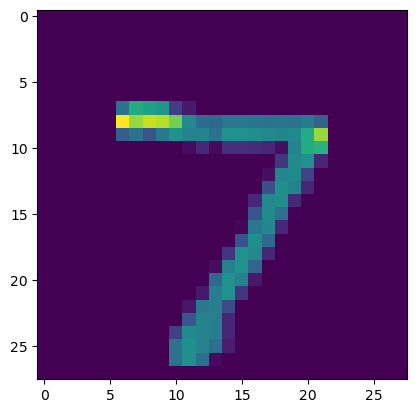

In [22]:
plt.imshow(x_test[0])

In [107]:
print(np.argmax(predictions[130]))

6


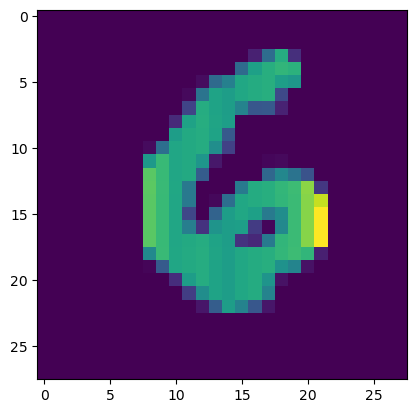

In [108]:
plt.imshow(x_test[130])

In [42]:
import cv2

img= cv2.imread('four-4.png')

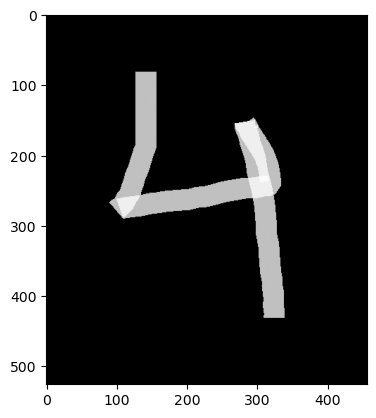

In [43]:
plt.imshow(img)

In [44]:
img.shape

(526, 456, 3)

In [45]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [46]:
gray.shape

(526, 456)

In [47]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

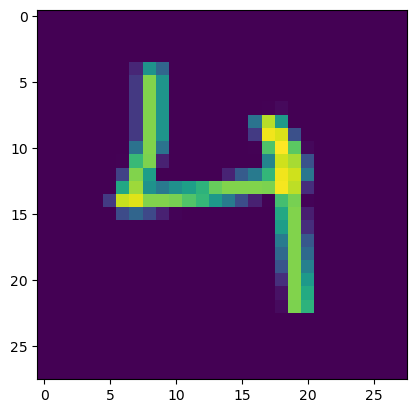

In [48]:
plt.imshow(resized)

In [49]:
resized.shape

(28, 28)

In [50]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [51]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [52]:
newimg.shape

(1, 28, 28, 1)

In [53]:
predicions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [54]:
print (np.argmax(predicions))

4


# Testing With Other Numbers



In [68]:
img1= cv2.imread('zero-0.png')

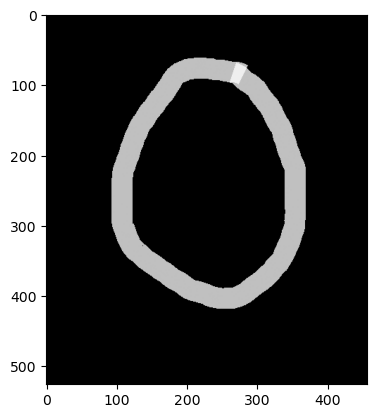

In [69]:
plt.imshow(img1)

In [70]:
img1.shape

(526, 456, 3)

In [71]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [72]:
gray1.shape

(526, 456)

In [73]:
resized1 = cv2.resize(gray1, (28,28), interpolation = cv2.INTER_AREA)

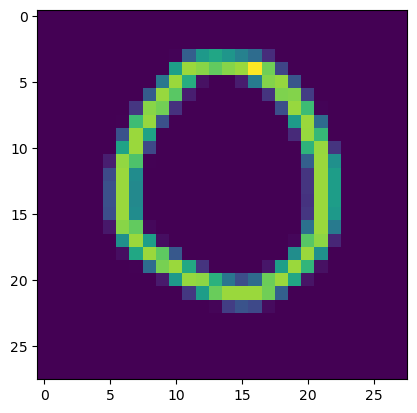

In [74]:
plt.imshow(resized1)

In [75]:
resized1.shape

(28, 28)

In [76]:
newimg1 = tf.keras.utils.normalize(resized1, axis = 1)

In [77]:
newimg1 = np.array(newimg1).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [78]:
newimg1.shape

(1, 28, 28, 1)

In [79]:
predicions = model.predict(newimg1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [80]:
print (np.argmax(predicions))

0


# Trial

In [ ]:
img2= cv2.imread('nine-9.png')

In [ ]:
plt.imshow(img2)

In [ ]:
img2.shape

In [ ]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
gray2.shape

In [ ]:
resized2 = cv2.resize(gray2, (28,28), interpolation = cv2.INTER_AREA)

In [ ]:
plt.imshow(resized2)

In [ ]:
resized2.shape

In [ ]:
newimg2 = tf.keras.utils.normalize(resized2, axis = 1)

In [ ]:
newimg2 = np.array(newimg2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
newimg2.shape

In [ ]:
predicions = model.predict(newimg2)

In [ ]:
print (np.argmax(predicions))

In [869]:
from PIL import ImageGrab
im=ImageGrab.grab(bbox=(105,275,850,975))

In [870]:
im.save("H:/image/"+"im.png")

In [871]:
img3= cv2.imread('H:/image/im.png')

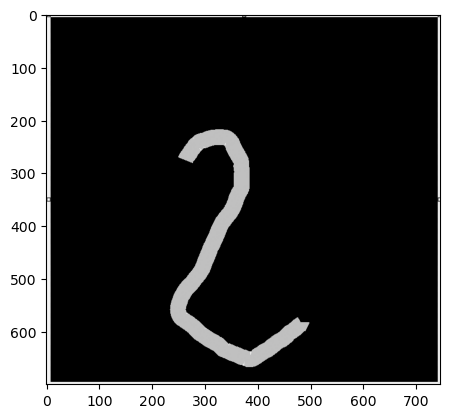

In [872]:
plt.imshow(img3)

In [873]:
img3.shape

(700, 745, 3)

In [874]:
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [875]:
gray3.shape

(700, 745)

In [876]:
resized3 = cv2.resize(gray3, (28,28), interpolation = cv2.INTER_AREA)

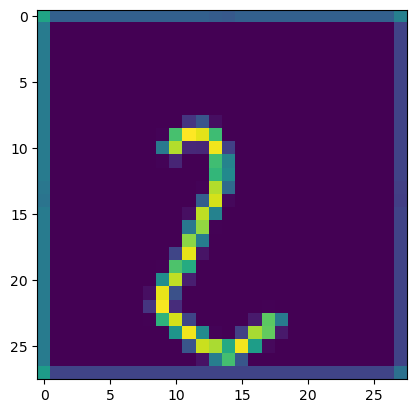

In [877]:
plt.imshow(resized3)

In [878]:
resized3.shape

(28, 28)

In [879]:
newimg3 = tf.keras.utils.normalize(resized3, axis = 1)

In [880]:
newimg3 = np.array(newimg3).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [881]:
newimg3.shape

(1, 28, 28, 1)

In [882]:
predicions = model.predict(newimg3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [883]:
print (np.argmax(predicions))

2
